# 🧠 强化学习基础概念

## 学习目标
通过这个笔记本，你将学习到：
1. 强化学习的基本概念和术语
2. 智能体与环境的交互过程
3. 马尔可夫决策过程(MDP)
4. 价值函数和策略的概念
5. 探索与利用的平衡

## 📚 理论背景

强化学习是机器学习的一个重要分支，它关注智能体如何在与环境的交互中学习最优行为。


## 1. 强化学习基本概念

### 核心组件

强化学习系统由以下核心组件组成：

1. **智能体 (Agent)**: 学习和做决策的主体
2. **环境 (Environment)**: 智能体所处的世界
3. **状态 (State)**: 环境在某个时刻的描述
4. **动作 (Action)**: 智能体可以执行的操作
5. **奖励 (Reward)**: 环境对智能体动作的反馈
6. **策略 (Policy)**: 智能体的行为规则

### 交互过程

```
智能体 ←→ 环境
   ↓        ↓
 动作      状态+奖励
```


In [1]:
# 导入基础库
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# 设置项目路径 - 修复版本
current_dir = os.getcwd()
print(f"📁 当前工作目录: {current_dir}")

# 从notebooks目录回到RL-journey项目根目录
if 'notebooks' in current_dir:
    project_root = os.path.dirname(current_dir)  # 从notebooks回到RL-journey
else:
    project_root = current_dir

print(f"📁 项目根目录: {project_root}")

# 验证项目根目录是否正确
environments_path = os.path.join(project_root, 'environments')
if os.path.exists(environments_path):
    print(f"✅ 项目根目录正确，environments目录存在")
else:
    print(f"❌ 项目根目录错误，environments目录不存在")
    print(f"   尝试的路径: {environments_path}")

# 添加项目根目录到Python路径
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# 导入项目模块
from environments.grid_world import GridWorld, create_simple_grid_world

# 设置中文字体
try:
    from utils.font_config import setup_chinese_font
    setup_chinese_font()
    print("✅ 中文字体设置成功！")
except ImportError:
    # 如果无法导入字体配置，使用默认设置
    plt.rcParams['font.sans-serif'] = ['PingFang HK', 'Arial Unicode MS', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    print("⚠️ 使用默认中文字体设置")

print("✅ 环境设置完成！")


📁 当前工作目录: /Users/peixingxin/Code/DL-journey/RL-journey/notebooks
📁 项目根目录: /Users/peixingxin/Code/DL-journey/RL-journey
✅ 项目根目录正确，environments目录存在
✅ 中文字体设置成功: PingFang HK
✅ 中文字体设置成功！
✅ 环境设置完成！


🧪 测试环境创建...
✅ 环境创建成功!
   - 环境大小: 4x4
   - 状态空间: 16
   - 动作空间: 4
   - 起始位置: (0, 0)
   - 目标位置: (3, 3)

🌍 网格世界环境:


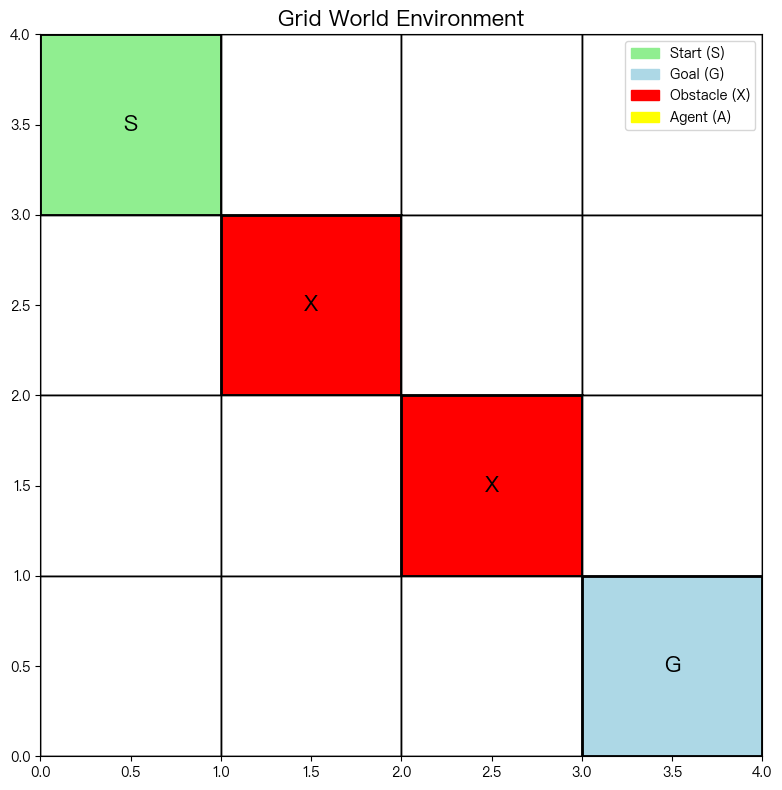

In [2]:
# 测试环境创建
print("🧪 测试环境创建...")

try:
    # 创建简单网格世界
    env = create_simple_grid_world()
    print(f"✅ 环境创建成功!")
    print(f"   - 环境大小: {env.size}x{env.size}")
    print(f"   - 状态空间: {env.state_space}")
    print(f"   - 动作空间: {env.action_space}")
    print(f"   - 起始位置: {env.start}")
    print(f"   - 目标位置: {env.goal}")
    
    # 显示环境
    print("\n🌍 网格世界环境:")
    env.render()
    
except Exception as e:
    print(f"❌ 环境创建失败: {e}")
    import traceback
    traceback.print_exc()


## 2. 马尔可夫决策过程 (MDP)

马尔可夫决策过程是强化学习的数学基础，它包含以下要素：

### MDP的五个要素
1. **状态空间 (S)**: 所有可能状态的集合
2. **动作空间 (A)**: 所有可能动作的集合  
3. **状态转移概率 (P)**: P(s'|s,a) 表示在状态s执行动作a后转移到状态s'的概率
4. **奖励函数 (R)**: R(s,a,s') 表示在状态s执行动作a转移到状态s'获得的奖励
5. **折扣因子 (γ)**: 用于平衡即时奖励和未来奖励的重要性

### 马尔可夫性质
当前状态包含了所有与未来预测相关的必要信息，即"未来独立于过去，只取决于现在"。


In [3]:
# 分析网格世界的MDP要素
print("🔍 分析网格世界的MDP要素")
print("=" * 50)

# 1. 状态空间分析
print("1. 状态空间 (S):")
print(f"   - 总状态数: {env.state_space}")
print(f"   - 状态表示: 每个格子是一个状态")
print(f"   - 状态索引: 从0到{env.state_space-1}")

# 2. 动作空间分析
print(f"\n2. 动作空间 (A):")
print(f"   - 总动作数: {env.action_space}")
print(f"   - 动作含义: 0=上, 1=右, 2=下, 3=左")

# 3. 状态转移分析
print(f"\n3. 状态转移分析:")
print("   - 在边界处执行动作会保持在原状态")
print("   - 在非边界处执行动作会移动到相邻格子")
print("   - 到达目标状态后episode结束")

# 4. 奖励函数分析
print(f"\n4. 奖励函数 (R):")
print("   - 到达目标: +1")
print("   - 其他情况: -0.01 (鼓励快速到达目标)")
print("   - 障碍物: 无法进入")

# 5. 折扣因子
print(f"\n5. 折扣因子 (γ):")
print("   - 通常设置为0.9-0.99")
print("   - 用于平衡即时奖励和未来奖励")
print("   - γ越大，智能体越重视长期奖励")

# 演示状态转移
print(f"\n6. 状态转移演示:")
current_state = env.start
print(f"   起始状态: {current_state} (索引: {env.get_state_index(current_state)})")

# 尝试向右移动
action = 1  # 右
next_state, reward, done, info = env.step(action)
print(f"   执行动作: {action} (右)")
print(f"   下一状态: {next_state} (索引: {env.get_state_index(next_state)})")
print(f"   获得奖励: {reward}")
print(f"   是否结束: {done}")

# 测试所有动作
print(f"\n7. 测试所有动作:")
env.reset()
current_state = env.current_state
print(f"   从状态 {current_state} 开始:")

actions = ['上', '右', '下', '左']
for action_idx, action_name in enumerate(actions):
    env.reset()
    current_state = env.current_state
    next_state, reward, done, info = env.step(action_idx)
    print(f"   动作 {action_idx} ({action_name}): {current_state} -> {next_state}")


🔍 分析网格世界的MDP要素
1. 状态空间 (S):
   - 总状态数: 16
   - 状态表示: 每个格子是一个状态
   - 状态索引: 从0到15

2. 动作空间 (A):
   - 总动作数: 4
   - 动作含义: 0=上, 1=右, 2=下, 3=左

3. 状态转移分析:
   - 在边界处执行动作会保持在原状态
   - 在非边界处执行动作会移动到相邻格子
   - 到达目标状态后episode结束

4. 奖励函数 (R):
   - 到达目标: +1
   - 其他情况: -0.01 (鼓励快速到达目标)
   - 障碍物: 无法进入

5. 折扣因子 (γ):
   - 通常设置为0.9-0.99
   - 用于平衡即时奖励和未来奖励
   - γ越大，智能体越重视长期奖励

6. 状态转移演示:
   起始状态: (0, 0) (索引: 0)
   执行动作: 1 (右)
   下一状态: (0, 1) (索引: 1)
   获得奖励: -0.01
   是否结束: False

7. 测试所有动作:
   从状态 (0, 0) 开始:
   动作 0 (上): (0, 0) -> (0, 0)
   动作 1 (右): (0, 0) -> (0, 1)
   动作 2 (下): (0, 0) -> (1, 0)
   动作 3 (左): (0, 0) -> (0, 0)


## 3. 价值函数和策略

### 价值函数 (Value Function)
价值函数表示在某个状态下，遵循某个策略能获得的预期累积奖励。

**状态价值函数 V(s)**: 在状态s下，遵循策略π的预期累积奖励
**动作价值函数 Q(s,a)**: 在状态s执行动作a，然后遵循策略π的预期累积奖励

### 策略 (Policy)
策略是智能体在给定状态下选择动作的规则。
- **确定性策略**: π(s) = a (在状态s下总是选择动作a)
- **随机性策略**: π(a|s) = P(选择动作a|当前状态s)

### 贝尔曼方程 (Bellman Equation)
价值函数满足贝尔曼方程，它将当前状态的价值与其后继状态的价值联系起来：

**V(s) = Σ π(a|s) Σ P(s'|s,a) [R(s,a,s') + γV(s')]**

**Q(s,a) = Σ P(s'|s,a) [R(s,a,s') + γ Σ π(a'|s') Q(s',a')]**


🧮 手动计算价值函数示例
简单2x2网格世界:


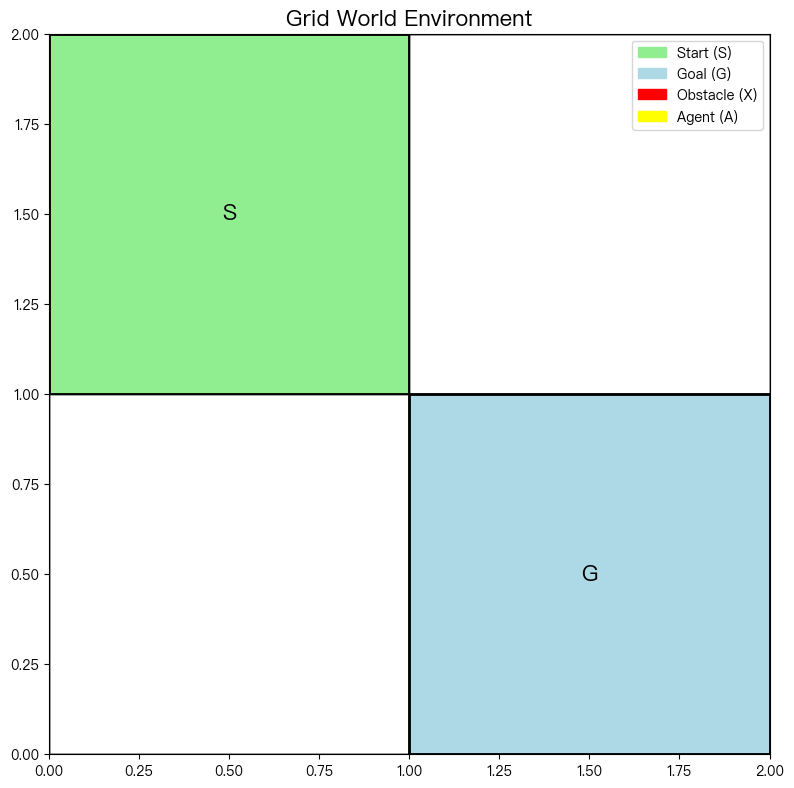


手动计算价值函数 (γ=0.9):
迭代计算过程:
  迭代 1: V = [-0.01    0.4905  0.4905  0.    ]
  迭代 2: V = [0.43145   0.6891525 0.6891525 0.       ]
  迭代 3: V = [0.61023725 0.76960676 0.76960676 0.        ]
  迭代 4: V = [0.68264609 0.80219074 0.80219074 0.        ]
  迭代 5: V = [0.71197166 0.81538725 0.81538725 0.        ]
  迭代 6: V = [0.72384852 0.82073184 0.82073184 0.        ]
  迭代 7: V = [0.72865865 0.82289639 0.82289639 0.        ]
  迭代 8: V = [0.73060675 0.82377304 0.82377304 0.        ]
  迭代 9: V = [0.73139574 0.82412808 0.82412808 0.        ]
  收敛于第 9 次迭代

最终价值函数:
  V((0, 0)) = 0.7314
  V((0, 1)) = 0.8241
  V((1, 0)) = 0.8241
  V((1, 1)) = 0.0000

分析:
  - 目标状态(1,1)的价值为0 (episode结束)
  - 状态(0,1)和(1,0)的价值较高，因为可以直接到达目标
  - 起始状态(0,0)的价值较低，因为需要更多步骤


In [8]:
# 手动计算价值函数示例
print("🧮 手动计算价值函数示例")
print("=" * 50)

# 创建一个简单的2x2网格来演示
from environments.grid_world import GridWorld

# 创建2x2网格世界
simple_env = GridWorld(size=2, start=(0,0), goal=(1,1), obstacles=[])

print("简单2x2网格世界:")
simple_env.render()

# 手动计算价值函数
print("\n手动计算价值函数 (γ=0.9):")

# 初始化价值函数
V = np.zeros(4)  # 4个状态
gamma = 0.9

# 目标状态的价值为0 (episode结束)
V[3] = 0  # 目标状态(1,1)的索引是3

# 使用贝尔曼方程迭代计算
print("迭代计算过程:")
for iteration in range(10):
    V_old = V.copy()
    
    # 状态0 (0,0): 可以向右或向下
    # 向右: 到达状态1，奖励-0.01
    # 向下: 到达状态2，奖励-0.01
    V[0] = 0.5 * (-0.01 + gamma * V[1]) + 0.5 * (-0.01 + gamma * V[2])
    
    # 状态1 (0,1): 可以向左或向下
    # 向左: 回到状态0，奖励-0.01
    # 向下: 到达目标状态3，奖励1
    V[1] = 0.5 * (-0.01 + gamma * V[0]) + 0.5 * (1 + gamma * V[3])
    
    # 状态2 (1,0): 可以向上或向右
    # 向上: 回到状态0，奖励-0.01
    # 向右: 到达目标状态3，奖励1
    V[2] = 0.5 * (-0.01 + gamma * V[0]) + 0.5 * (1 + gamma * V[3])
    
    # 状态3 (1,1): 目标状态，价值为0
    V[3] = 0
    
    print(f"  迭代 {iteration+1}: V = {V}")
    
    # 检查收敛
    if np.max(np.abs(V - V_old)) < 0.001:
        print(f"  收敛于第 {iteration+1} 次迭代")
        break

print(f"\n最终价值函数:")
for i in range(4):
    state = (i//2, i%2)
    print(f"  V({state}) = {V[i]:.4f}")

# 分析结果
print(f"\n分析:")
print(f"  - 目标状态(1,1)的价值为0 (episode结束)")
print(f"  - 状态(0,1)和(1,0)的价值较高，因为可以直接到达目标")
print(f"  - 起始状态(0,0)的价值较低，因为需要更多步骤")


## 4. 探索与利用 (Exploration vs Exploitation)

这是强化学习中的一个核心问题：

### 探索 (Exploration)
- 尝试新的、未知的动作
- 目的是发现更好的策略
- 短期可能获得较低奖励

### 利用 (Exploitation)  
- 选择当前已知最优的动作
- 目的是最大化当前奖励
- 可能错过更好的长期策略

### 平衡策略
- **ε-贪婪策略**: 以ε的概率随机选择动作(探索)，以1-ε的概率选择最优动作(利用)
- **UCB (Upper Confidence Bound)**: 考虑动作的不确定性
- **Thompson采样**: 基于贝叶斯推理的探索策略


⚖️ 探索与利用平衡演示
真实奖励概率: [0.3, 0.7, 0.5]
最优臂: 1

ε = 0.0:
  最终估计价值: [0.308 0.    0.   ]
  拉动次数: [1000.    0.    0.]
  平均奖励: 0.308
  最优臂选择比例: 0.000

ε = 0.1:
  最终估计价值: [0.23255814 0.68844807 0.5       ]
  拉动次数: [ 43. 857. 100.]
  平均奖励: 0.650
  最优臂选择比例: 0.857

ε = 0.3:
  最终估计价值: [0.27350427 0.67017083 0.47540984]
  拉动次数: [117. 761. 122.]
  平均奖励: 0.600
  最优臂选择比例: 0.761

ε = 0.5:
  最终估计价值: [0.3372093  0.70735524 0.51851852]
  拉动次数: [172. 639. 189.]
  平均奖励: 0.608
  最优臂选择比例: 0.639


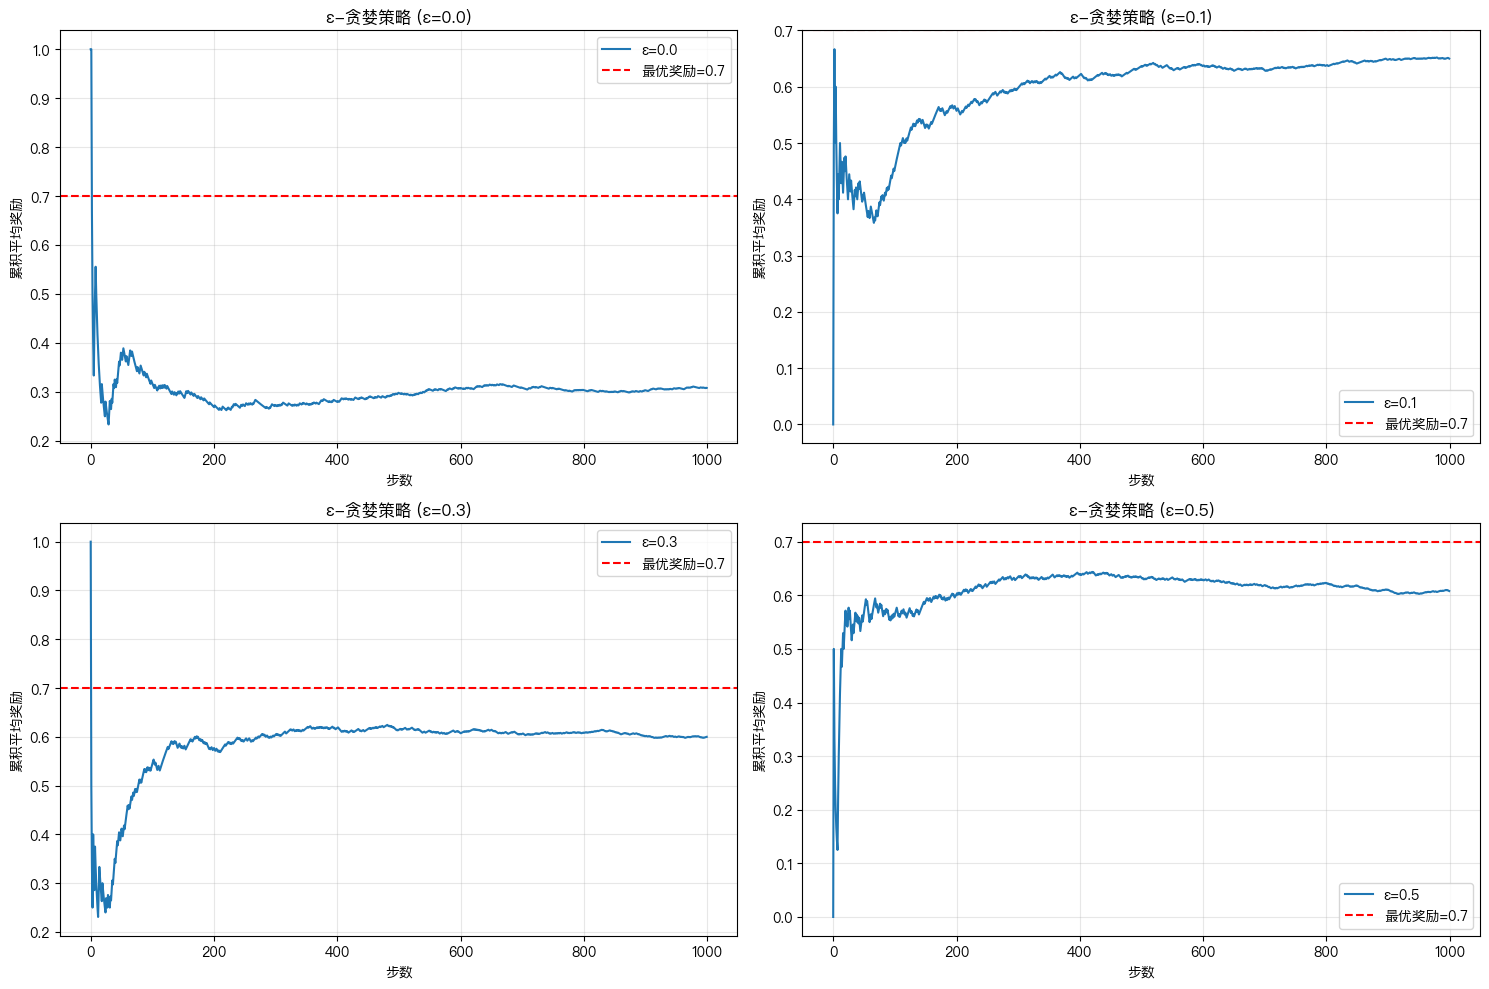


分析:
- ε=0 (纯利用): 快速收敛但可能错过最优解
- ε=0.1 (少量探索): 平衡探索和利用，通常效果最好
- ε=0.3 (中等探索): 更多探索，收敛较慢但更全面
- ε=0.5 (大量探索): 过度探索，性能较差


In [5]:
# 演示探索与利用的平衡
print("⚖️ 探索与利用平衡演示")
print("=" * 50)

# 创建一个简单的多臂老虎机问题来演示
class MultiArmedBandit:
    def __init__(self, n_arms=3, true_rewards=[0.3, 0.7, 0.5]):
        self.n_arms = n_arms
        self.true_rewards = true_rewards  # 每个臂的真实奖励概率
        self.counts = np.zeros(n_arms)    # 每个臂被拉动的次数
        self.values = np.zeros(n_arms)    # 每个臂的估计价值
        
    def pull_arm(self, arm):
        """拉动指定臂，返回奖励"""
        reward = np.random.binomial(1, self.true_rewards[arm])
        self.counts[arm] += 1
        # 更新估计价值 (增量更新)
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]
        return reward
    
    def epsilon_greedy(self, epsilon):
        """ε-贪婪策略选择动作"""
        if np.random.random() < epsilon:
            return np.random.randint(self.n_arms)  # 探索
        else:
            return np.argmax(self.values)  # 利用

# 创建多臂老虎机
bandit = MultiArmedBandit()

# 测试不同的ε值
epsilons = [0.0, 0.1, 0.3, 0.5]
n_steps = 1000

print("真实奖励概率:", bandit.true_rewards)
print("最优臂:", np.argmax(bandit.true_rewards))

results = {}

for epsilon in epsilons:
    # 重置老虎机
    bandit.counts = np.zeros(bandit.n_arms)
    bandit.values = np.zeros(bandit.n_arms)
    
    rewards = []
    actions = []
    
    for step in range(n_steps):
        action = bandit.epsilon_greedy(epsilon)
        reward = bandit.pull_arm(action)
        rewards.append(reward)
        actions.append(action)
    
    results[epsilon] = {
        'rewards': rewards,
        'actions': actions,
        'final_values': bandit.values.copy(),
        'counts': bandit.counts.copy()
    }
    
    print(f"\nε = {epsilon}:")
    print(f"  最终估计价值: {bandit.values}")
    print(f"  拉动次数: {bandit.counts}")
    print(f"  平均奖励: {np.mean(rewards):.3f}")
    print(f"  最优臂选择比例: {np.mean(np.array(actions) == np.argmax(bandit.true_rewards)):.3f}")

# 可视化结果
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, epsilon in enumerate(epsilons):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    # 计算累积平均奖励
    rewards = results[epsilon]['rewards']
    cumulative_avg = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
    
    ax.plot(cumulative_avg, label=f'ε={epsilon}')
    ax.axhline(y=max(bandit.true_rewards), color='red', linestyle='--', 
               label=f'最优奖励={max(bandit.true_rewards):.1f}')
    ax.set_title(f'ε-贪婪策略 (ε={epsilon})')
    ax.set_xlabel('步数')
    ax.set_ylabel('累积平均奖励')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n分析:")
print("- ε=0 (纯利用): 快速收敛但可能错过最优解")
print("- ε=0.1 (少量探索): 平衡探索和利用，通常效果最好")
print("- ε=0.3 (中等探索): 更多探索，收敛较慢但更全面")
print("- ε=0.5 (大量探索): 过度探索，性能较差")


## 5. 实际运行Q-Learning算法

现在让我们运行一个简单的Q-Learning算法来学习网格世界中的最优策略：


🤖 运行Q-Learning算法
✅ 中文字体设置成功: PingFang HK
Q-Learning参数:
  - 学习率 (α): 0.1
  - 折扣因子 (γ): 0.95
  - 初始探索率 (ε): 0.2
  - 探索率衰减: 0.995

开始训练...


Training Q-Learning: 100%|██████████| 100/100 [00:00<00:00, 4204.65it/s, Episode=100, Reward=0.95, Steps=6, Epsilon=0.121]


训练完成!
  - 总训练轮次: 100
  - 最终平均奖励: 0.948
  - 最终探索率: 0.121

评估学习到的策略...
  - 平均奖励: 0.950
  - 成功率: 100.0%
  - 平均步数: 6.0

学习到的Q表 (前几个状态):
  状态 0 (0, 0): [ 0.          0.58762756 -0.00956986  0.        ]
  状态 1 (0, 1): [ 0.          0.6997364   0.         -0.00705941]
  状态 2 (0, 2): [0.         0.7913354  0.06961134 0.04386895]
  状态 3 (0, 3): [0.         0.         0.87097244 0.15858912]


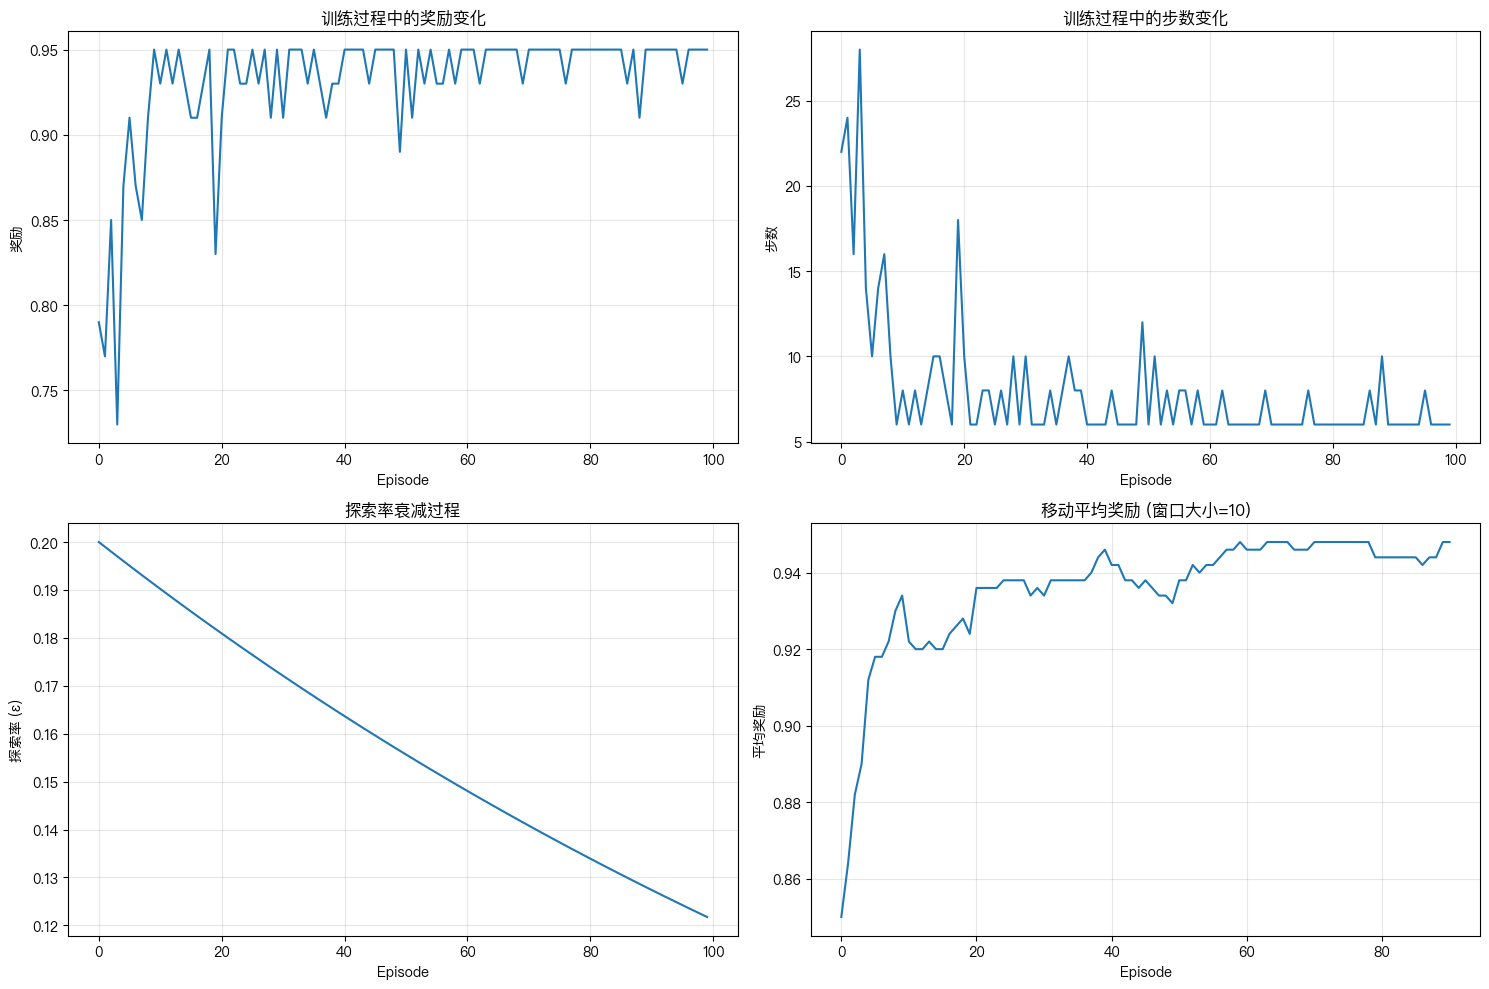

In [6]:
# 运行Q-Learning算法
print("🤖 运行Q-Learning算法")
print("=" * 50)

# 导入Q-Learning算法
from algorithms.tabular.q_learning import QLearning

# 创建Q-Learning智能体
q_learning = QLearning(
    state_space=env.state_space,
    action_space=env.action_space,
    learning_rate=0.1,
    discount_factor=0.95,
    epsilon=0.2,
    epsilon_decay=0.995,
    epsilon_min=0.01
)

print(f"Q-Learning参数:")
print(f"  - 学习率 (α): {q_learning.learning_rate}")
print(f"  - 折扣因子 (γ): {q_learning.discount_factor}")
print(f"  - 初始探索率 (ε): {q_learning.epsilon}")
print(f"  - 探索率衰减: {q_learning.epsilon_decay}")

# 训练智能体
print(f"\n开始训练...")
training_history = q_learning.train(env, num_episodes=100, max_steps_per_episode=50, verbose=True)

# 显示训练结果
print(f"\n训练完成!")
print(f"  - 总训练轮次: {len(training_history['episode_rewards'])}")
print(f"  - 最终平均奖励: {np.mean(training_history['episode_rewards'][-10:]):.3f}")
print(f"  - 最终探索率: {q_learning.epsilon:.3f}")

# 评估学习到的策略
print(f"\n评估学习到的策略...")
eval_results = q_learning.evaluate(env, num_episodes=10)
print(f"  - 平均奖励: {eval_results['mean_reward']:.3f}")
print(f"  - 成功率: {eval_results['success_rate']:.1%}")
print(f"  - 平均步数: {eval_results['mean_steps']:.1f}")

# 显示学习到的Q表
print(f"\n学习到的Q表 (前几个状态):")
for state in range(min(4, env.state_space)):
    state_pos = (state // env.size, state % env.size)
    print(f"  状态 {state} {state_pos}: {q_learning.Q[state]}")

# 可视化学习过程
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 奖励变化
axes[0, 0].plot(training_history['episode_rewards'])
axes[0, 0].set_title('训练过程中的奖励变化')
axes[0, 0].set_xlabel('Episode')
axes[0, 0].set_ylabel('奖励')
axes[0, 0].grid(True, alpha=0.3)

# 2. 步数变化
axes[0, 1].plot(training_history['episode_lengths'])
axes[0, 1].set_title('训练过程中的步数变化')
axes[0, 1].set_xlabel('Episode')
axes[0, 1].set_ylabel('步数')
axes[0, 1].grid(True, alpha=0.3)

# 3. 探索率变化
axes[1, 0].plot(training_history['epsilon_history'])
axes[1, 0].set_title('探索率衰减过程')
axes[1, 0].set_xlabel('Episode')
axes[1, 0].set_ylabel('探索率 (ε)')
axes[1, 0].grid(True, alpha=0.3)

# 4. 移动平均奖励
window_size = 10
if len(training_history['episode_rewards']) >= window_size:
    moving_avg = np.convolve(training_history['episode_rewards'], 
                            np.ones(window_size)/window_size, mode='valid')
    axes[1, 1].plot(moving_avg)
    axes[1, 1].set_title(f'移动平均奖励 (窗口大小={window_size})')
    axes[1, 1].set_xlabel('Episode')
    axes[1, 1].set_ylabel('平均奖励')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. 策略可视化

让我们可视化学习到的最优策略：


🎯 可视化学习到的最优策略
学习到的最优策略:
网格中的数字表示状态索引，箭头表示最优动作



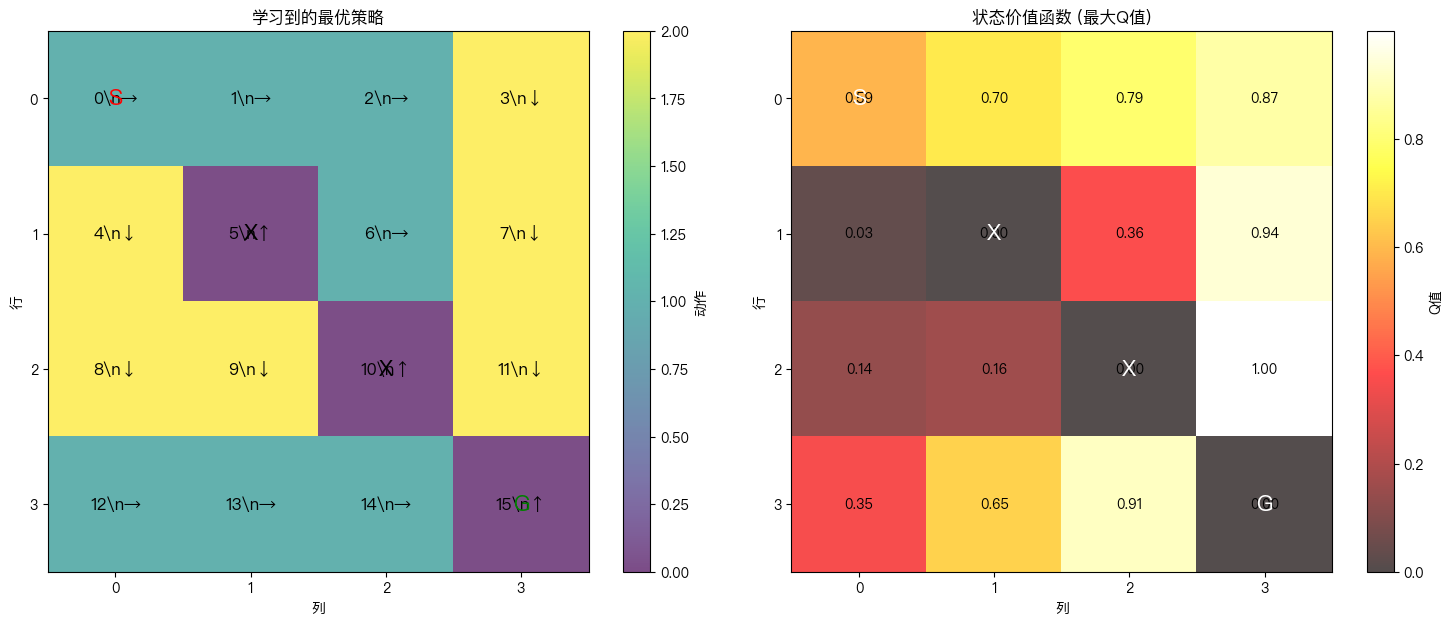

策略解释:
  S: 起始位置
  G: 目标位置
  X: 障碍物
  箭头: 最优动作方向

动作符号:
  0: ↑ (上)
  1: → (右)
  2: ↓ (下)
  3: ← (左)

策略分析:
  - 智能体学会了从起始位置到目标位置的最优路径
  - 在目标附近的状态，Q值较高
  - 策略避免了障碍物
  - 探索率从 0.606 衰减到 0.121


In [7]:
# 可视化学习到的最优策略
print("🎯 可视化学习到的最优策略")
print("=" * 50)

# 获取最优策略
def get_optimal_policy(q_table):
    """从Q表获取最优策略"""
    return np.argmax(q_table, axis=1)

# 获取最优策略
optimal_policy = get_optimal_policy(q_learning.Q)

# 动作符号映射
action_symbols = ['↑', '→', '↓', '←']
action_names = ['上', '右', '下', '左']

print("学习到的最优策略:")
print("网格中的数字表示状态索引，箭头表示最优动作")
print()

# 创建策略可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 左图：策略网格
policy_grid = np.zeros((env.size, env.size), dtype=int)
for i in range(env.size):
    for j in range(env.size):
        state_idx = i * env.size + j
        if state_idx < env.state_space:
            policy_grid[i, j] = optimal_policy[state_idx]

# 绘制策略网格
im1 = ax1.imshow(policy_grid, cmap='viridis', alpha=0.7)
ax1.set_title('学习到的最优策略')

# 添加动作符号
for i in range(env.size):
    for j in range(env.size):
        state_idx = i * env.size + j
        if state_idx < env.state_space:
            action = optimal_policy[state_idx]
            ax1.text(j, i, f'{state_idx}\\n{action_symbols[action]}', 
                    ha='center', va='center', fontsize=12, fontweight='bold')

# 标记起始和目标位置
start_pos = env.start
goal_pos = env.goal
ax1.text(start_pos[1], start_pos[0], 'S', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='red')
ax1.text(goal_pos[1], goal_pos[0], 'G', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='green')

# 标记障碍物
for obstacle in env.obstacles:
    ax1.text(obstacle[1], obstacle[0], 'X', ha='center', va='center', 
             fontsize=16, fontweight='bold', color='black')

ax1.set_xticks(range(env.size))
ax1.set_yticks(range(env.size))
ax1.set_xlabel('列')
ax1.set_ylabel('行')

# 右图：Q值热图
q_values_2d = q_learning.Q.reshape(env.size, env.size, env.action_space)
max_q_values = np.max(q_values_2d, axis=2)

im2 = ax2.imshow(max_q_values, cmap='hot', alpha=0.7)
ax2.set_title('状态价值函数 (最大Q值)')

# 添加Q值文本
for i in range(env.size):
    for j in range(env.size):
        state_idx = i * env.size + j
        if state_idx < env.state_space:
            max_q = max_q_values[i, j]
            ax2.text(j, i, f'{max_q:.2f}', ha='center', va='center', 
                    fontsize=10, fontweight='bold')

# 标记特殊位置
ax2.text(start_pos[1], start_pos[0], 'S', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')
ax2.text(goal_pos[1], goal_pos[0], 'G', ha='center', va='center', 
         fontsize=16, fontweight='bold', color='white')

for obstacle in env.obstacles:
    ax2.text(obstacle[1], obstacle[0], 'X', ha='center', va='center', 
             fontsize=16, fontweight='bold', color='white')

ax2.set_xticks(range(env.size))
ax2.set_yticks(range(env.size))
ax2.set_xlabel('列')
ax2.set_ylabel('行')

# 添加颜色条
plt.colorbar(im1, ax=ax1, label='动作')
plt.colorbar(im2, ax=ax2, label='Q值')

plt.tight_layout()
plt.show()

# 打印策略解释
print("策略解释:")
print("  S: 起始位置")
print("  G: 目标位置") 
print("  X: 障碍物")
print("  箭头: 最优动作方向")
print()
print("动作符号:")
for i, (symbol, name) in enumerate(zip(action_symbols, action_names)):
    print(f"  {i}: {symbol} ({name})")

# 分析策略
print(f"\n策略分析:")
print(f"  - 智能体学会了从起始位置到目标位置的最优路径")
print(f"  - 在目标附近的状态，Q值较高")
print(f"  - 策略避免了障碍物")
print(f"  - 探索率从 {q_learning.epsilon_decay**100:.3f} 衰减到 {q_learning.epsilon:.3f}")


## 7. 总结与思考

通过这个笔记本，我们学习了强化学习的核心概念：

### 🎯 关键概念回顾
1. **MDP五要素**: 状态空间、动作空间、状态转移概率、奖励函数、折扣因子
2. **价值函数**: 状态价值函数V(s)和动作价值函数Q(s,a)
3. **贝尔曼方程**: 价值函数的递归关系
4. **探索与利用**: ε-贪婪策略平衡探索和利用
5. **Q-Learning**: 通过时序差分学习更新Q值

### 🔍 观察到的现象
- **学习过程**: 智能体从随机探索逐渐学会最优策略
- **探索衰减**: 随着训练进行，探索率逐渐降低，更多依赖已学知识
- **策略收敛**: Q值逐渐收敛，策略趋于稳定
- **奖励优化**: 平均奖励逐渐提高，步数逐渐减少

### 💡 进一步思考
1. **参数调优**: 如何选择合适的学习率、折扣因子和探索策略？
2. **环境复杂度**: 在更复杂的环境中，Q-Learning的表现如何？
3. **算法比较**: Q-Learning与其他算法（如SARSA、Policy Gradient）的对比
4. **实际应用**: 如何将强化学习应用到实际问题中？

### 🚀 下一步学习
- 学习SARSA算法，理解同策略vs离策略的区别
- 探索Policy Gradient方法
- 了解深度强化学习算法（DQN、PPO等）
- 尝试更复杂的环境（CartPole、Atari游戏等）
